In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("fcc-forum-pageviews.csv")

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [6]:
lower_limit = df['value'].quantile(0.025)
upper_limit = df['value'].quantile(0.975)
df_clean = df[(df['value'] > lower_limit) & (df['value'] < upper_limit)]

In [7]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(df.index, df['value'], color = 'blue')
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019.")
    ax.set_xlabel('Date')
    ax.set_ylabel('page views')
    fig.savefig('line_plot.png')
    return fig

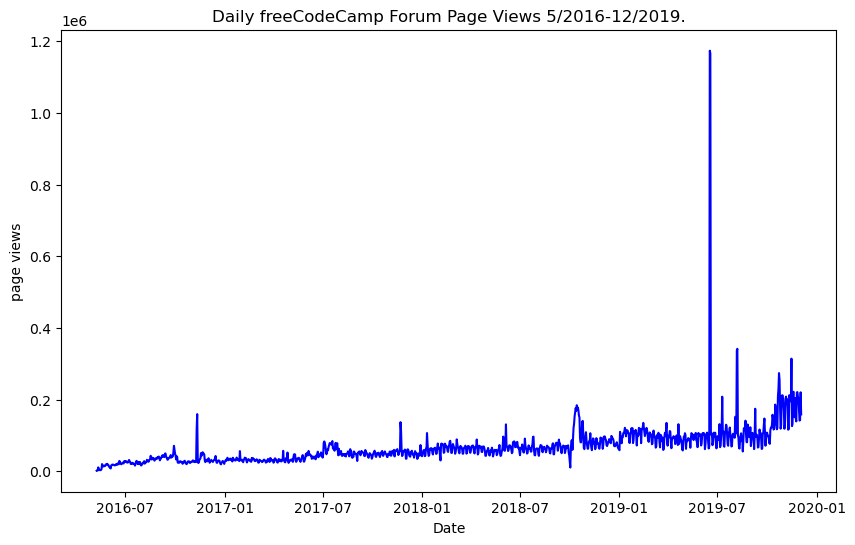

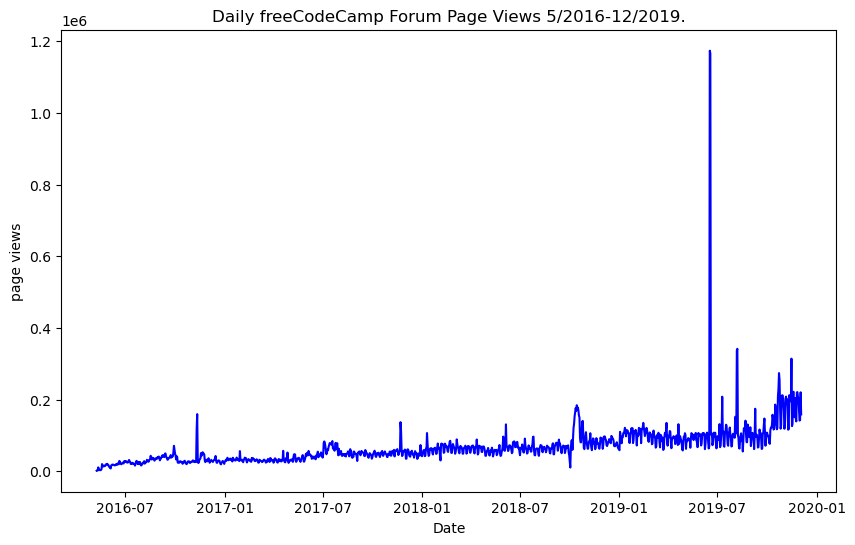

In [10]:
draw_line_plot()

In [8]:
def draw_bar_plot():
    df_bar = df.copy()
    df_bar['month'] = df_bar.index.month
    df_bar['year'] = df_bar.index.year
    df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    fig = df_grouped.plot(kind='bar', figsize=(12,8)).get_figure()
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(
        title='Months',
        labels=[
            'January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December'
        ]
    )
    fig.savefig('bar_plot.png')
    return fig


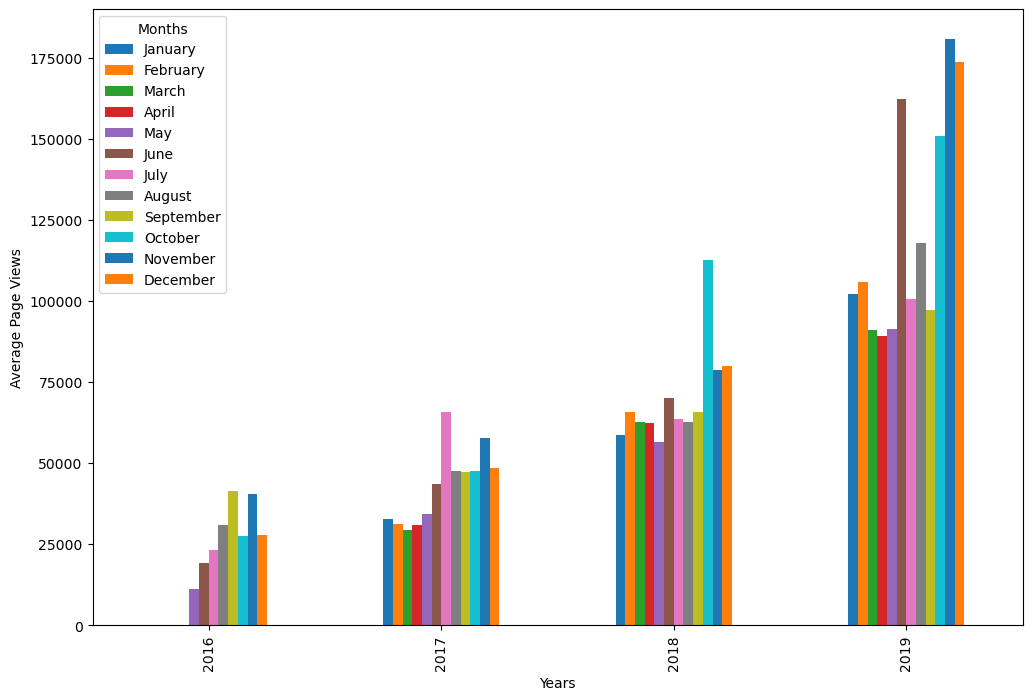

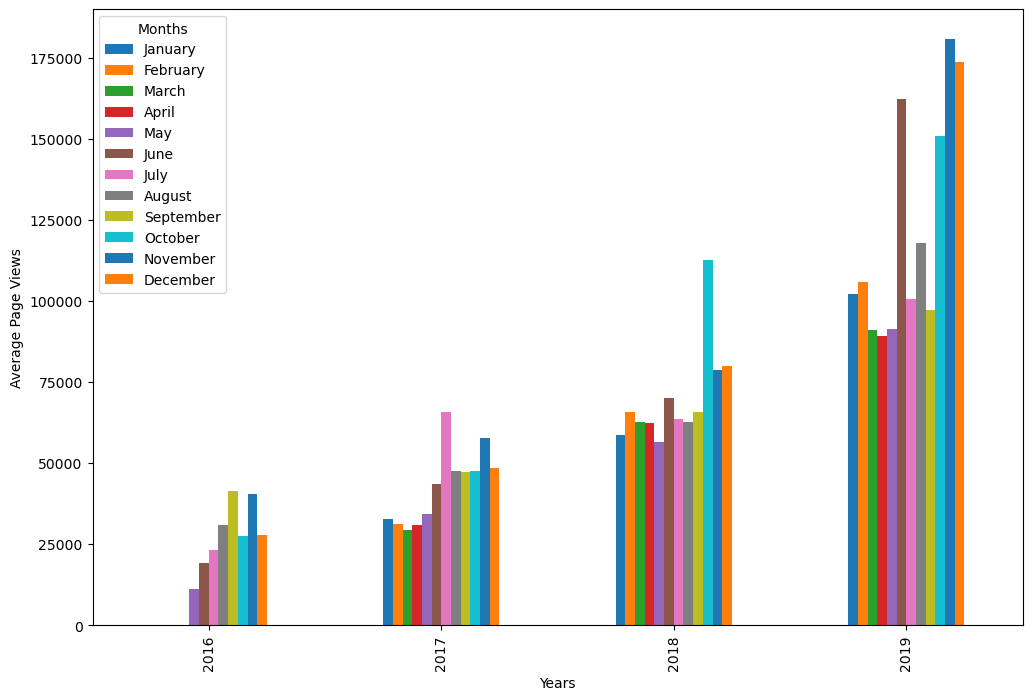

In [11]:
draw_bar_plot()

In [9]:

def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')   
    df_box['month_num'] = df_box['date'].dt.month 
    
    df_box = df_box.sort_values('month_num')
    
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    return fig

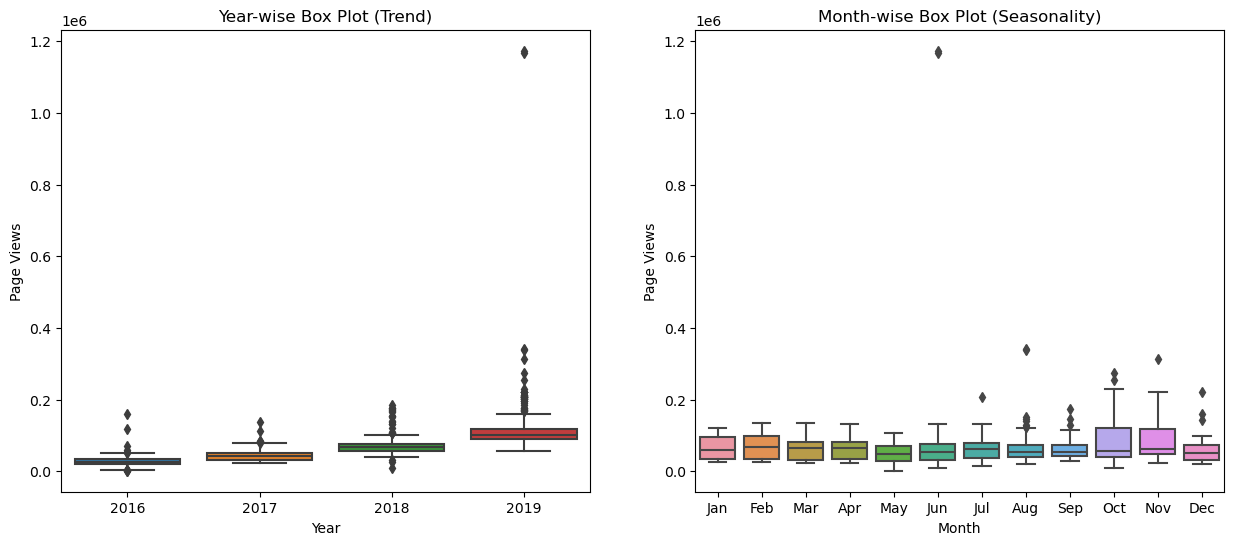

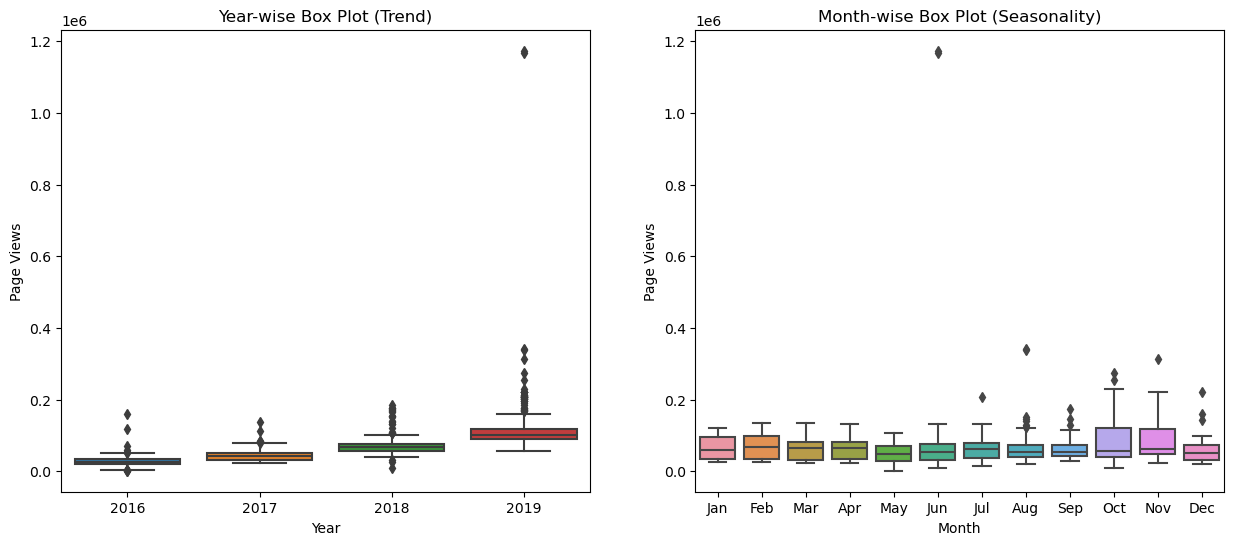

In [12]:
draw_box_plot()